# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

19:57:11 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=856559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=881658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=405751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=110865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

19:57:12 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=383216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=644720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

19:57:13 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=478824;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=382451;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

19:57:14 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=693672;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=50566;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

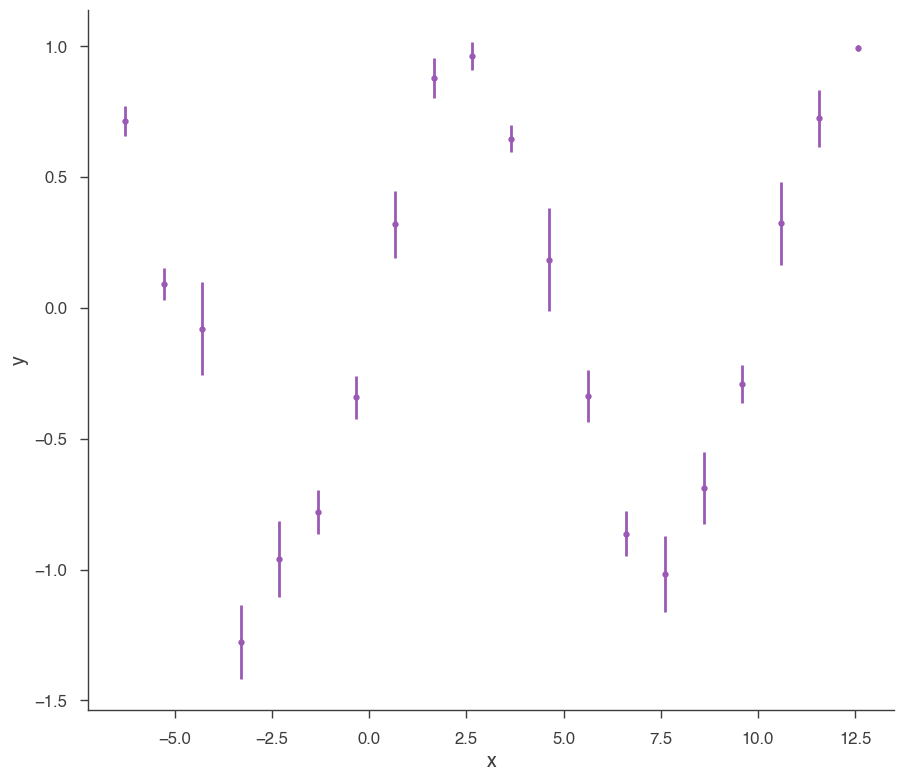

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=298697;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=760266;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

19:57:17 INFO      Mean acceptance fraction: 0.7131000000000001                                ]8;id=565466;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=373901;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=266785;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=250617;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=629456;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=301520;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 -0.10 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 -0.08 +0.06) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.571122
total,-11.571122


Values of statistical measures:

,statistical measures
AIC,27.848127
BIC,29.133709
DIC,27.149003
PDIC,1.998213


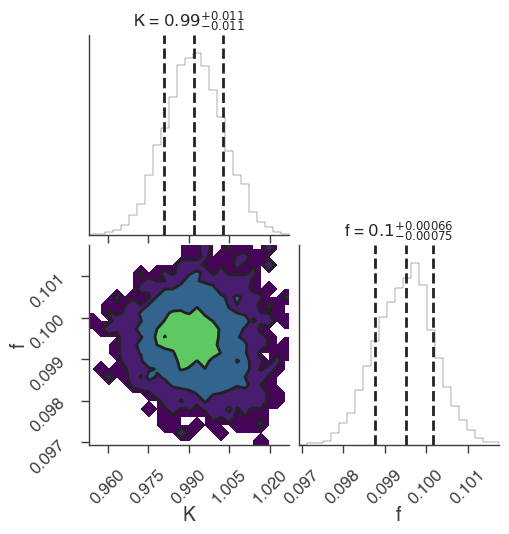

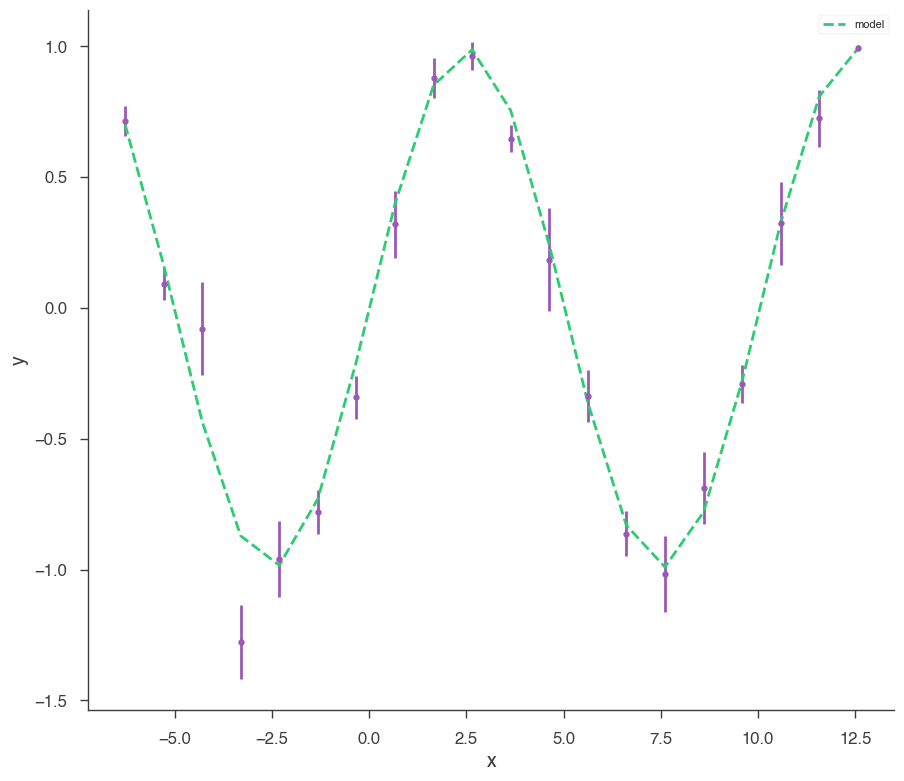

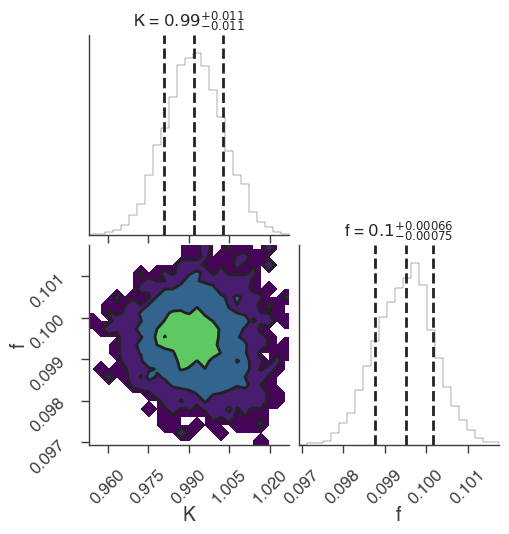

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

19:57:18 INFO      sampler set to multinest                                                ]8;id=486986;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=131726;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -20.903905785696043      +/-  0.14484299108020074     
 Total Likelihood Evaluations:         6409
 Sampling finished. Exiting MultiNest



19:57:19 INFO      fit restored to maximum of posterior                                         ]8;id=532709;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=475372;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=859412;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=395386;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 -0.09 +0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.571813
total,-11.571813


Values of statistical measures:

,statistical measures
AIC,27.849509
BIC,29.135091
DIC,26.842468
PDIC,1.845826
log(Z),-9.078451


         INFO      deleting the chain directory chains                                     ]8;id=155635;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=929265;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

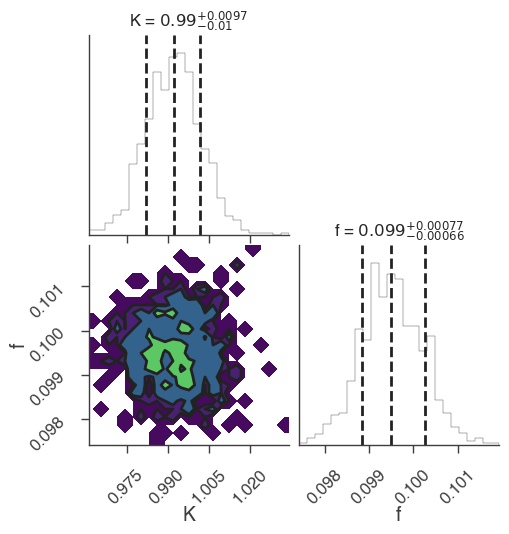

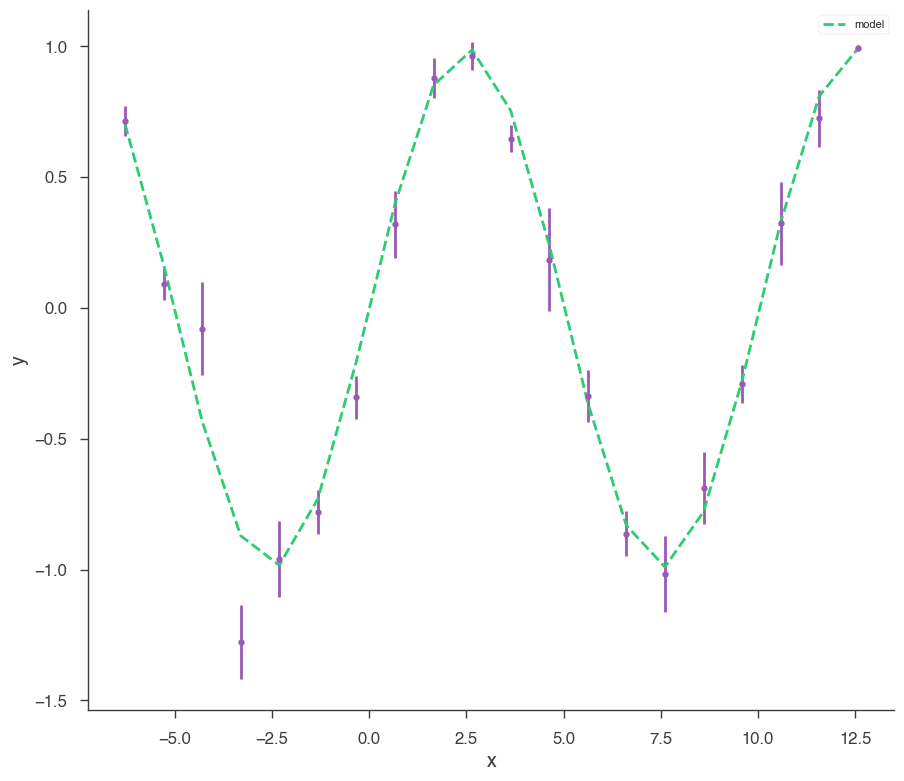

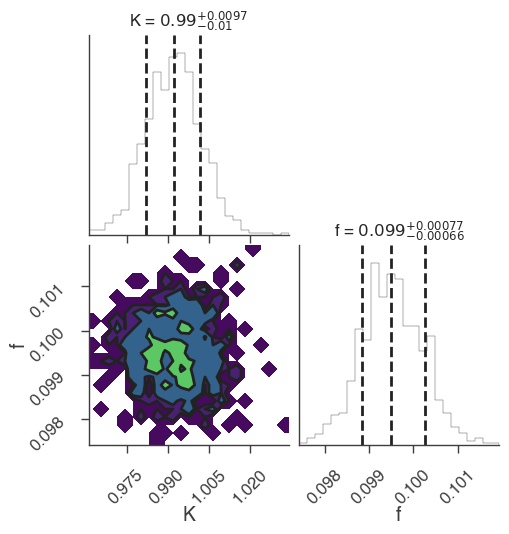

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

19:57:20 INFO      sampler set to dynesty_nested                                           ]8;id=998664;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=704559;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

252it [00:00, 2515.83it/s, bound: 0 | nc: 5 | ncall: 750 | eff(%): 33.600 | loglstar:   -inf < -5622.355 <    inf | logz: -5629.669 +/-  0.135 | dlogz: 5660.922 >  0.409]

504it [00:00, 2022.47it/s, bound: 0 | nc: 1 | ncall: 1365 | eff(%): 36.923 | loglstar:   -inf < -2097.270 <    inf | logz: -2105.213 +/-  0.141 | dlogz: 2104.301 >  0.409]

713it [00:00, 1494.30it/s, bound: 0 | nc: 17 | ncall: 2340 | eff(%): 30.470 | loglstar:   -inf < -1610.506 <    inf | logz: -1617.955 +/-  0.128 | dlogz: 1603.982 >  0.409]

876it [00:00, 1130.55it/s, bound: 0 | nc: 3 | ncall: 3570 | eff(%): 24.538 | loglstar:   -inf < -1362.228 <    inf | logz: -1370.898 +/-  0.142 | dlogz: 1357.824 >  0.409] 

1004it [00:00, 1063.65it/s, bound: 0 | nc: 36 | ncall: 4856 | eff(%): 20.675 | loglstar:   -inf < -1234.944 <    inf | logz: -1242.680 +/-  0.135 | dlogz: 1228.975 >  0.409]

1119it [00:01, 850.47it/s, bound: 0 | nc: 1 | ncall: 6422 | eff(%): 17.424 | loglstar:   -inf < -1094.345 <    inf | logz: -1103.369 +/-  0.145 | dlogz: 1090.419 >  0.409]  

1213it [00:01, 705.49it/s, bound: 0 | nc: 16 | ncall: 8299 | eff(%): 14.616 | loglstar:   -inf < -997.613 <    inf | logz: -1007.060 +/-  0.147 | dlogz: 993.916 >  0.409] 

1291it [00:01, 619.36it/s, bound: 0 | nc: 30 | ncall: 9926 | eff(%): 13.006 | loglstar:   -inf < -936.171 <    inf | logz: -945.840 +/-  0.150 | dlogz: 932.652 >  0.409] 

1358it [00:01, 510.90it/s, bound: 0 | nc: 40 | ncall: 11707 | eff(%): 11.600 | loglstar:   -inf < -757.839 <    inf | logz: -766.869 +/-  0.149 | dlogz: 752.774 >  0.409]

1414it [00:01, 461.37it/s, bound: 0 | nc: 10 | ncall: 13264 | eff(%): 10.660 | loglstar:   -inf < -644.635 <    inf | logz: -654.845 +/-  0.159 | dlogz: 645.303 >  0.409]

1463it [00:02, 360.04it/s, bound: 1 | nc: 1 | ncall: 14581 | eff(%): 10.034 | loglstar:   -inf < -524.551 <    inf | logz: -534.205 +/-  0.151 | dlogz: 520.057 >  0.409] 

1667it [00:02, 648.64it/s, bound: 1 | nc: 3 | ncall: 14995 | eff(%): 11.117 | loglstar:   -inf < -260.747 <    inf | logz: -271.017 +/-  0.152 | dlogz: 256.093 >  0.409]

1757it [00:02, 643.01it/s, bound: 2 | nc: 3 | ncall: 15218 | eff(%): 11.546 | loglstar:   -inf < -206.274 <    inf | logz: -215.125 +/-  0.145 | dlogz: 199.194 >  0.409]

1921it [00:02, 848.22it/s, bound: 2 | nc: 2 | ncall: 15626 | eff(%): 12.294 | loglstar:   -inf < -135.361 <    inf | logz: -145.074 +/-  0.144 | dlogz: 128.760 >  0.409]

2028it [00:02, 765.72it/s, bound: 3 | nc: 1 | ncall: 15887 | eff(%): 12.765 | loglstar:   -inf < -104.181 <    inf | logz: -113.311 +/-  0.145 | dlogz: 96.618 >  0.409] 

2183it [00:02, 935.14it/s, bound: 3 | nc: 1 | ncall: 16219 | eff(%): 13.460 | loglstar:   -inf < -69.951 <    inf | logz: -78.879 +/-  0.144 | dlogz: 61.724 >  0.409]  

2295it [00:02, 826.72it/s, bound: 4 | nc: 1 | ncall: 16475 | eff(%): 13.930 | loglstar:   -inf < -53.584 <    inf | logz: -62.824 +/-  0.147 | dlogz: 45.393 >  0.409]

2438it [00:02, 957.45it/s, bound: 4 | nc: 17 | ncall: 16918 | eff(%): 14.411 | loglstar:   -inf < -38.949 <    inf | logz: -48.514 +/-  0.146 | dlogz: 30.876 >  0.409]

2548it [00:03, 854.31it/s, bound: 5 | nc: 3 | ncall: 17145 | eff(%): 14.861 | loglstar:   -inf < -32.950 <    inf | logz: -42.272 +/-  0.144 | dlogz: 24.367 >  0.409] 

2704it [00:03, 1014.23it/s, bound: 5 | nc: 8 | ncall: 17573 | eff(%): 15.387 | loglstar:   -inf < -26.010 <    inf | logz: -35.383 +/-  0.144 | dlogz: 17.074 >  0.409]

2819it [00:03, 910.17it/s, bound: 6 | nc: 1 | ncall: 17794 | eff(%): 15.842 | loglstar:   -inf < -22.234 <    inf | logz: -31.664 +/-  0.145 | dlogz: 13.061 >  0.409] 

2967it [00:03, 852.66it/s, bound: 7 | nc: 1 | ncall: 18174 | eff(%): 16.326 | loglstar:   -inf < -18.915 <    inf | logz: -28.410 +/-  0.145 | dlogz:  9.430 >  0.409]

3183it [00:03, 1130.86it/s, bound: 7 | nc: 8 | ncall: 18516 | eff(%): 17.191 | loglstar:   -inf < -15.884 <    inf | logz: -25.277 +/-  0.145 | dlogz:  5.751 >  0.409]

3313it [00:03, 994.76it/s, bound: 8 | nc: 1 | ncall: 18789 | eff(%): 17.633 | loglstar:   -inf < -14.725 <    inf | logz: -24.090 +/-  0.145 | dlogz:  4.248 >  0.409] 

3535it [00:03, 1263.77it/s, bound: 8 | nc: 4 | ncall: 19134 | eff(%): 18.475 | loglstar:   -inf < -13.327 <    inf | logz: -22.768 +/-  0.145 | dlogz:  2.457 >  0.409]

3681it [00:04, 1077.65it/s, bound: 9 | nc: 2 | ncall: 19439 | eff(%): 18.936 | loglstar:   -inf < -12.832 <    inf | logz: -22.219 +/-  0.145 | dlogz:  1.662 >  0.409]

3898it [00:04, 1317.53it/s, bound: 9 | nc: 1 | ncall: 19784 | eff(%): 19.703 | loglstar:   -inf < -12.285 <    inf | logz: -21.702 +/-  0.145 | dlogz:  0.908 >  0.409]

4051it [00:04, 1135.47it/s, bound: 10 | nc: 1 | ncall: 20082 | eff(%): 20.172 | loglstar:   -inf < -12.084 <    inf | logz: -21.472 +/-  0.145 | dlogz:  0.589 >  0.409]

4182it [00:04, 919.85it/s, +400 | bound: 10 | nc: 1 | ncall: 20681 | eff(%): 22.593 | loglstar:   -inf < -11.580 <    inf | logz: -20.985 +/-  0.145 | dlogz:  0.001 >  0.409]

19:57:24 INFO      fit restored to maximum of posterior                                         ]8;id=584644;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=395815;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=554837;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=711145;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 -0.09 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 +/- 0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.571202
total,-11.571202


Values of statistical measures:

,statistical measures
AIC,27.848286
BIC,29.133868
DIC,27.140325
PDIC,1.992752
log(Z),-9.113696


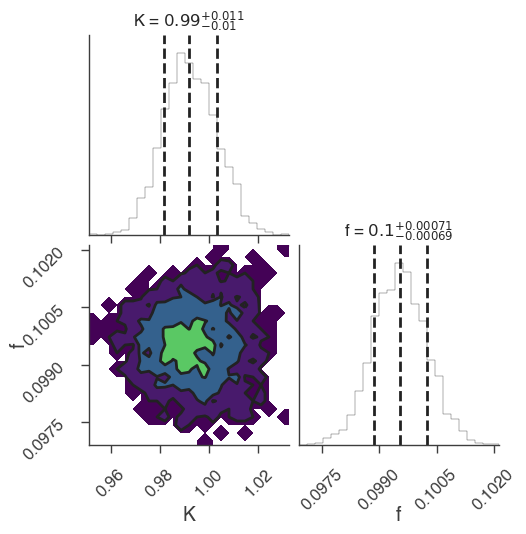

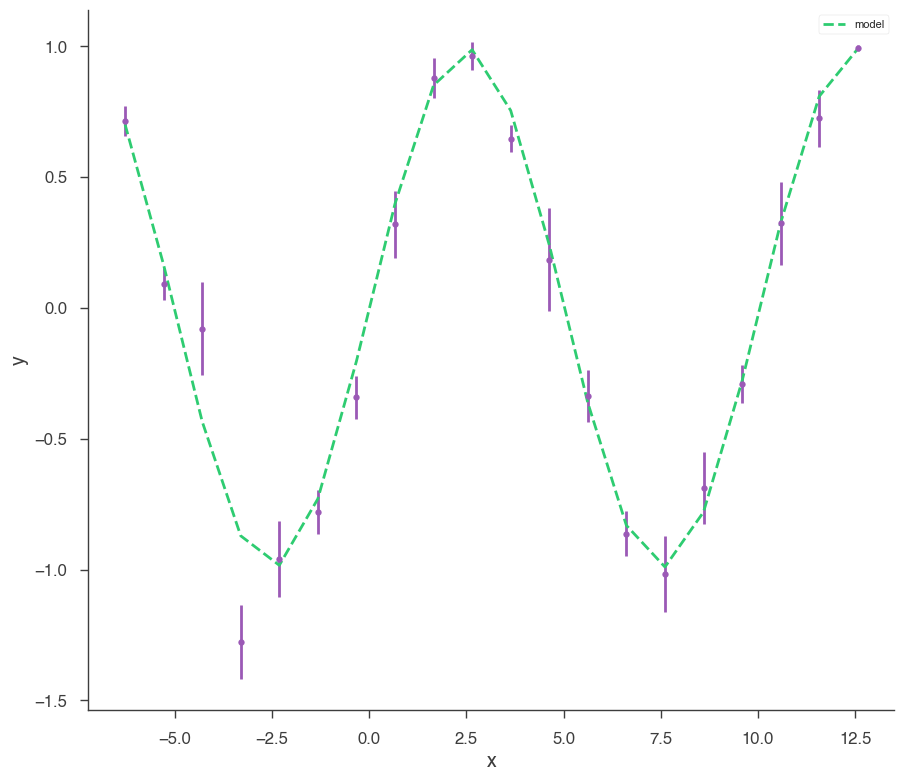

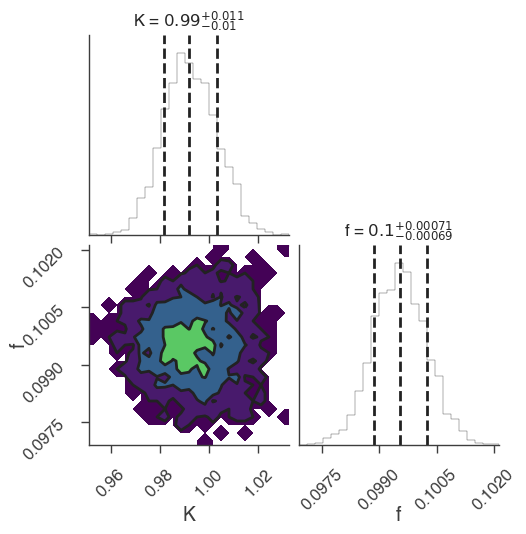

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

19:57:25 INFO      sampler set to dynesty_dynamic                                          ]8;id=611968;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=755708;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

121it [00:00, 1205.85it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 138 | eff(%): 18.966 | loglstar:   -inf < -11167.680 <    inf | logz: -11174.829 +/-  0.119 | dlogz: 11162.681 >  0.010]

336it [00:00, 1756.01it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 496 | eff(%): 33.735 | loglstar:   -inf < -4593.239 <    inf | logz: -4600.818 +/-  0.123 | dlogz: 4615.925 >  0.010]   

512it [00:00, 1726.06it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 910 | eff(%): 36.312 | loglstar:   -inf < -2703.937 <    inf | logz: -2711.868 +/-  0.126 | dlogz: 2707.594 >  0.010]

685it [00:00, 1534.36it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1520 | eff(%): 33.911 | loglstar:   -inf < -1968.799 <    inf | logz: -1976.963 +/-  0.125 | dlogz: 1958.391 >  0.010]

842it [00:00, 1266.40it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 2345 | eff(%): 29.596 | loglstar:   -inf < -1676.274 <    inf | logz: -1683.874 +/-  0.116 | dlogz: 1662.798 >  0.010]

976it [00:00, 1185.29it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 3184 | eff(%): 26.493 | loglstar:   -inf < -1509.790 <    inf | logz: -1517.458 +/-  0.118 | dlogz: 1501.360 >  0.010] 

1100it [00:00, 1109.55it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 4231 | eff(%): 23.251 | loglstar:   -inf < -1373.042 <    inf | logz: -1381.871 +/-  0.127 | dlogz: 1366.612 >  0.010]

1214it [00:01, 1007.80it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 5294 | eff(%): 20.953 | loglstar:   -inf < -1273.812 <    inf | logz: -1281.736 +/-  0.118 | dlogz: 1265.066 >  0.010]

1318it [00:01, 852.06it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 6520 | eff(%): 18.775 | loglstar:   -inf < -1202.749 <    inf | logz: -1210.513 +/-  0.117 | dlogz: 1193.458 >  0.010]

1408it [00:01, 680.42it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 7844 | eff(%): 16.874 | loglstar:   -inf < -1128.208 <    inf | logz: -1137.054 +/-  0.126 | dlogz: 1120.410 >  0.010] 

1483it [00:01, 647.85it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 9093 | eff(%): 15.459 | loglstar:   -inf < -1058.862 <    inf | logz: -1068.701 +/-  0.139 | dlogz: 1056.214 >  0.010]

1552it [00:01, 577.05it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 10242 | eff(%): 14.448 | loglstar:   -inf < -1013.800 <    inf | logz: -1023.084 +/-  0.128 | dlogz: 1007.494 >  0.010]

1613it [00:01, 554.64it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 11373 | eff(%): 13.585 | loglstar:   -inf < -970.522 <    inf | logz: -979.650 +/-  0.130 | dlogz: 963.999 >  0.010]    

1671it [00:02, 473.25it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 12731 | eff(%): 12.629 | loglstar:   -inf < -924.234 <    inf | logz: -933.092 +/-  0.129 | dlogz: 916.981 >  0.010]

1721it [00:02, 406.24it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 14175 | eff(%): 11.727 | loglstar:   -inf < -786.247 <    inf | logz: -796.593 +/-  0.144 | dlogz: 788.966 >  0.010] 

1764it [00:02, 339.31it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 15890 | eff(%): 10.763 | loglstar:   -inf < -688.581 <    inf | logz: -698.573 +/-  0.138 | dlogz: 683.437 >  0.010]

1801it [00:02, 294.40it/s, batch: 0 | bound: 0 | nc: 64 | ncall: 17530 | eff(%):  9.989 | loglstar:   -inf < -626.706 <    inf | logz: -635.762 +/-  0.132 | dlogz: 619.428 >  0.010]

1833it [00:02, 275.76it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17583 | eff(%): 10.137 | loglstar:   -inf < -565.103 <    inf | logz: -574.881 +/-  0.137 | dlogz: 559.146 >  0.010] 

1998it [00:02, 552.61it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17936 | eff(%): 10.837 | loglstar:   -inf < -336.803 <    inf | logz: -346.362 +/-  0.132 | dlogz: 330.929 >  0.010]

2126it [00:03, 545.82it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 18287 | eff(%): 11.316 | loglstar:   -inf < -246.015 <    inf | logz: -256.533 +/-  0.138 | dlogz: 241.452 >  0.010]

2287it [00:03, 754.33it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18649 | eff(%): 11.943 | loglstar:   -inf < -176.608 <    inf | logz: -186.383 +/-  0.133 | dlogz: 170.563 >  0.010]

2399it [00:03, 664.38it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19040 | eff(%): 12.277 | loglstar:   -inf < -143.905 <    inf | logz: -153.497 +/-  0.132 | dlogz: 137.352 >  0.010]

2543it [00:03, 818.91it/s, batch: 0 | bound: 3 | nc: 7 | ncall: 19461 | eff(%): 12.740 | loglstar:   -inf < -102.720 <    inf | logz: -112.337 +/-  0.132 | dlogz: 95.837 >  0.010] 

2650it [00:03, 701.21it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19790 | eff(%): 13.061 | loglstar:   -inf < -82.385 <    inf | logz: -91.757 +/-  0.130 | dlogz: 74.968 >  0.010]  

2835it [00:03, 932.84it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 20184 | eff(%): 13.706 | loglstar:   -inf < -58.683 <    inf | logz: -68.178 +/-  0.132 | dlogz: 51.016 >  0.010]

2957it [00:04, 794.26it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20543 | eff(%): 14.052 | loglstar:   -inf < -47.449 <    inf | logz: -56.872 +/-  0.131 | dlogz: 39.439 >  0.010]

3146it [00:04, 1016.63it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20921 | eff(%): 14.687 | loglstar:   -inf < -35.481 <    inf | logz: -44.989 +/-  0.130 | dlogz: 27.160 >  0.010]

3273it [00:04, 838.48it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21295 | eff(%): 15.017 | loglstar:   -inf < -29.984 <    inf | logz: -39.383 +/-  0.131 | dlogz: 21.285 >  0.010] 

3466it [00:04, 1057.20it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21640 | eff(%): 15.655 | loglstar:   -inf < -23.945 <    inf | logz: -33.509 +/-  0.131 | dlogz: 15.026 >  0.010]

3619it [00:04, 1161.24it/s, batch: 0 | bound: 6 | nc: 8 | ncall: 21996 | eff(%): 16.087 | loglstar:   -inf < -20.887 <    inf | logz: -30.355 +/-  0.130 | dlogz: 11.557 >  0.010]

3757it [00:04, 976.89it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22203 | eff(%): 16.548 | loglstar:   -inf < -18.838 <    inf | logz: -28.225 +/-  0.130 | dlogz:  9.146 >  0.010] 

3945it [00:04, 1172.86it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22562 | eff(%): 17.106 | loglstar:   -inf < -16.684 <    inf | logz: -26.120 +/-  0.130 | dlogz:  6.664 >  0.010]

4084it [00:05, 982.47it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22844 | eff(%): 17.495 | loglstar:   -inf < -15.451 <    inf | logz: -24.988 +/-  0.130 | dlogz:  5.256 >  0.010] 

4277it [00:05, 1184.39it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23171 | eff(%): 18.069 | loglstar:   -inf < -14.209 <    inf | logz: -23.774 +/-  0.130 | dlogz:  3.675 >  0.010]

4447it [00:05, 991.63it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23545 | eff(%): 18.494 | loglstar:   -inf < -13.404 <    inf | logz: -22.962 +/-  0.131 | dlogz:  2.580 >  0.010] 

4655it [00:05, 1210.89it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23860 | eff(%): 19.109 | loglstar:   -inf < -12.722 <    inf | logz: -22.288 +/-  0.131 | dlogz:  1.628 >  0.010]

4835it [00:05, 1341.97it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24229 | eff(%): 19.552 | loglstar:   -inf < -12.357 <    inf | logz: -21.897 +/-  0.131 | dlogz:  1.076 >  0.010]

4991it [00:05, 1096.95it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24467 | eff(%): 19.990 | loglstar:   -inf < -12.131 <    inf | logz: -21.660 +/-  0.131 | dlogz:  0.750 >  0.010]

5172it [00:05, 1248.92it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24820 | eff(%): 20.427 | loglstar:   -inf < -11.959 <    inf | logz: -21.467 +/-  0.131 | dlogz:  0.495 >  0.010]

5319it [00:06, 1026.05it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25095 | eff(%): 20.781 | loglstar:   -inf < -11.851 <    inf | logz: -21.356 +/-  0.131 | dlogz:  0.356 >  0.010]

5521it [00:06, 1232.51it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25399 | eff(%): 21.317 | loglstar:   -inf < -11.774 <    inf | logz: -21.249 +/-  0.131 | dlogz:  0.228 >  0.010]

5686it [00:06, 1326.89it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 25743 | eff(%): 21.667 | loglstar:   -inf < -11.718 <    inf | logz: -21.190 +/-  0.131 | dlogz:  0.160 >  0.010]

5838it [00:06, 1114.82it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25955 | eff(%): 22.068 | loglstar:   -inf < -11.684 <    inf | logz: -21.151 +/-  0.131 | dlogz:  0.116 >  0.010]

6017it [00:06, 1264.13it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26265 | eff(%): 22.481 | loglstar:   -inf < -11.650 <    inf | logz: -21.117 +/-  0.131 | dlogz:  0.080 >  0.010]

6162it [00:06, 1072.93it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26573 | eff(%): 22.761 | loglstar:   -inf < -11.632 <    inf | logz: -21.098 +/-  0.131 | dlogz:  0.060 >  0.010]

6384it [00:06, 1325.22it/s, batch: 0 | bound: 13 | nc: 3 | ncall: 26876 | eff(%): 23.320 | loglstar:   -inf < -11.614 <    inf | logz: -21.077 +/-  0.131 | dlogz:  0.038 >  0.010]

6570it [00:06, 1453.04it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27239 | eff(%): 23.685 | loglstar:   -inf < -11.604 <    inf | logz: -21.065 +/-  0.131 | dlogz:  0.026 >  0.010]

6734it [00:07, 1146.23it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 27471 | eff(%): 24.075 | loglstar:   -inf < -11.597 <    inf | logz: -21.058 +/-  0.131 | dlogz:  0.019 >  0.010]

6937it [00:07, 1338.01it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 27819 | eff(%): 24.496 | loglstar:   -inf < -11.591 <    inf | logz: -21.052 +/-  0.130 | dlogz:  0.012 >  0.010]

7291it [00:07, 1859.78it/s, batch: 0 | bound: 14 | nc: 1 | ncall: 28301 | eff(%): 25.535 | loglstar:   -inf < -11.585 <    inf | logz: -21.045 +/-  0.130 | dlogz:  0.005 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7543it [00:08, 840.98it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 28553 | eff(%): 26.418 | loglstar: -13.275 < -12.930 < -12.028 | logz: -21.040 +/-  0.134 | stop:  1.309]          

7727it [00:08, 970.79it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28814 | eff(%): 26.306 | loglstar: -13.275 < -12.792 < -12.028 | logz: -21.040 +/-  0.134 | stop:  1.309]

7911it [00:08, 1106.12it/s, batch: 1 | bound: 2 | nc: 5 | ncall: 29173 | eff(%): 26.607 | loglstar: -13.275 < -12.460 < -12.028 | logz: -21.040 +/-  0.134 | stop:  1.309]

8084it [00:08, 1009.91it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 29444 | eff(%): 26.943 | loglstar: -13.275 < -12.184 < -12.028 | logz: -21.040 +/-  0.134 | stop:  1.309]

8412it [00:08, 1413.40it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 29878 | eff(%): 27.807 | loglstar: -13.275 < -11.872 < -12.028 | logz: -21.040 +/-  0.134 | stop:  1.309]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8741it [00:09, 960.89it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 30251 | eff(%): 28.895 | loglstar: -13.275 < -11.580 < -12.028 | logz: -21.040 +/-  0.134 | stop:  0.999] 

8741it [00:09, 959.55it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 30251 | eff(%): 28.895 | loglstar: -13.275 < -11.580 < -12.028 | logz: -21.040 +/-  0.134 | stop:  0.999]

19:57:35 INFO      fit restored to maximum of posterior                                         ]8;id=334589;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=521077;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=906536;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=351333;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 -0.09 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 +/- 0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.571097
total,-11.571097


Values of statistical measures:

,statistical measures
AIC,27.848077
BIC,29.133659
DIC,27.019249
PDIC,1.930856
log(Z),-9.150569


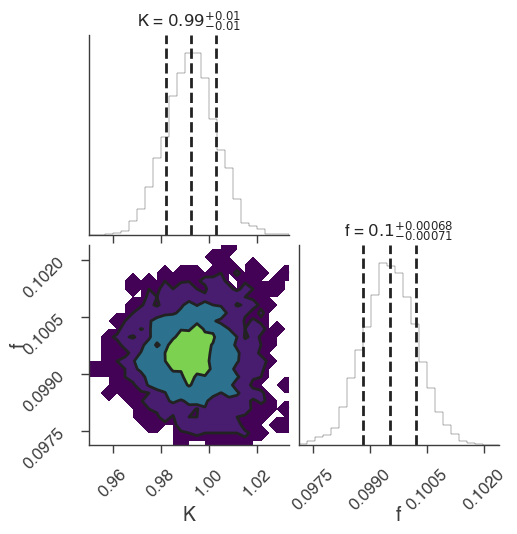

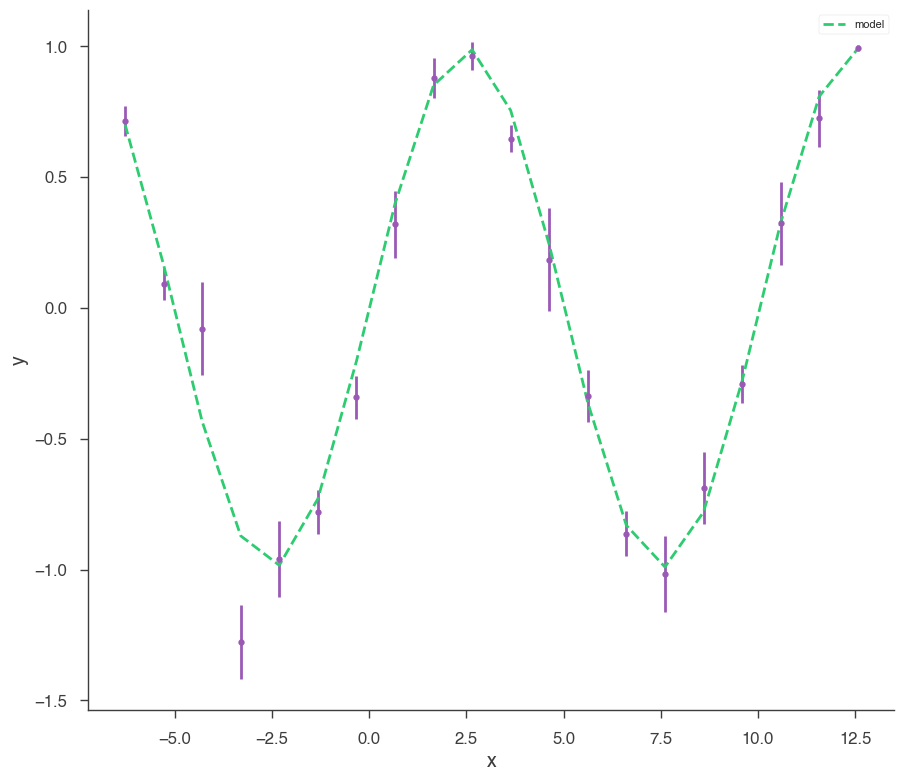

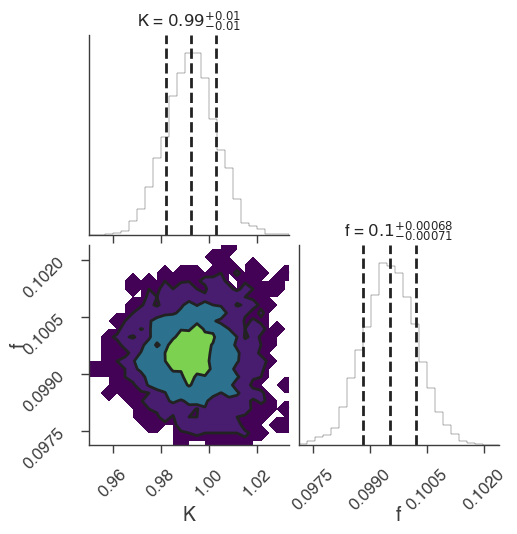

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=424135;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=160613;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:10, 58.14it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:11, 53.20it/s]

Sampling progress :   3%|▎         | 19/625 [00:00<00:10, 57.51it/s]

Sampling progress :   4%|▍         | 26/625 [00:00<00:09, 61.87it/s]

Sampling progress :   5%|▌         | 34/625 [00:00<00:08, 67.20it/s]

Sampling progress :   7%|▋         | 42/625 [00:00<00:08, 69.41it/s]

Sampling progress :   8%|▊         | 51/625 [00:00<00:07, 74.27it/s]

Sampling progress :   9%|▉         | 59/625 [00:00<00:07, 73.45it/s]

Sampling progress :  11%|█         | 67/625 [00:00<00:07, 74.46it/s]

Sampling progress :  12%|█▏        | 75/625 [00:01<00:07, 75.12it/s]

Sampling progress :  13%|█▎        | 83/625 [00:01<00:07, 74.21it/s]

Sampling progress :  15%|█▍        | 91/625 [00:01<00:07, 73.61it/s]

Sampling progress :  16%|█▌        | 99/625 [00:01<00:07, 72.98it/s]

Sampling progress :  17%|█▋        | 108/625 [00:01<00:06, 76.47it/s]

Sampling progress :  19%|█▊        | 116/625 [00:01<00:06, 74.17it/s]

Sampling progress :  20%|█▉        | 124/625 [00:01<00:08, 58.23it/s]

Sampling progress :  21%|██        | 132/625 [00:01<00:07, 61.83it/s]

Sampling progress :  22%|██▏       | 140/625 [00:02<00:07, 65.83it/s]

Sampling progress :  24%|██▎       | 148/625 [00:02<00:07, 68.03it/s]

Sampling progress :  25%|██▍       | 156/625 [00:02<00:06, 70.01it/s]

Sampling progress :  26%|██▌       | 164/625 [00:02<00:06, 70.29it/s]

Sampling progress :  28%|██▊       | 172/625 [00:02<00:06, 69.61it/s]

Sampling progress :  29%|██▉       | 181/625 [00:02<00:05, 74.49it/s]

Sampling progress :  30%|███       | 189/625 [00:02<00:06, 72.11it/s]

Sampling progress :  32%|███▏      | 198/625 [00:02<00:05, 75.74it/s]

Sampling progress :  33%|███▎      | 206/625 [00:02<00:05, 76.62it/s]

Sampling progress :  34%|███▍      | 215/625 [00:03<00:05, 77.80it/s]

Sampling progress :  36%|███▌      | 223/625 [00:03<00:05, 74.85it/s]

Sampling progress :  37%|███▋      | 231/625 [00:03<00:05, 75.75it/s]

Sampling progress :  38%|███▊      | 239/625 [00:03<00:05, 75.09it/s]

Sampling progress :  40%|███▉      | 247/625 [00:03<00:05, 71.51it/s]

Sampling progress :  41%|████      | 255/625 [00:03<00:05, 72.11it/s]

Sampling progress :  42%|████▏     | 263/625 [00:03<00:05, 71.40it/s]

Sampling progress :  43%|████▎     | 271/625 [00:03<00:04, 73.24it/s]

Sampling progress :  45%|████▍     | 279/625 [00:03<00:04, 71.50it/s]

Sampling progress :  46%|████▌     | 287/625 [00:04<00:04, 71.49it/s]

Sampling progress :  47%|████▋     | 295/625 [00:04<00:04, 69.93it/s]

Sampling progress :  48%|████▊     | 303/625 [00:04<00:04, 70.75it/s]

Sampling progress :  50%|████▉     | 311/625 [00:04<00:04, 71.65it/s]

Sampling progress :  51%|█████     | 319/625 [00:04<00:04, 72.49it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:04<00:04, 71.69it/s]

Sampling progress :  54%|█████▍    | 336/625 [00:04<00:03, 74.28it/s]

Sampling progress :  55%|█████▌    | 345/625 [00:04<00:03, 77.14it/s]

Sampling progress :  57%|█████▋    | 354/625 [00:04<00:03, 78.65it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:05<00:03, 78.30it/s]

Sampling progress :  59%|█████▉    | 371/625 [00:05<00:03, 80.33it/s]

Sampling progress :  61%|██████    | 380/625 [00:05<00:02, 82.15it/s]

Sampling progress :  62%|██████▏   | 389/625 [00:05<00:02, 80.33it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:05<00:02, 77.50it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:05<00:02, 77.33it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:05<00:02, 74.60it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:05<00:02, 77.97it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:05<00:02, 77.62it/s]

Sampling progress :  70%|███████   | 439/625 [00:06<00:02, 74.46it/s]

Sampling progress :  72%|███████▏  | 448/625 [00:06<00:02, 76.54it/s]

Sampling progress :  73%|███████▎  | 456/625 [00:06<00:02, 75.21it/s]

Sampling progress :  74%|███████▍  | 464/625 [00:06<00:02, 71.91it/s]

Sampling progress :  76%|███████▌  | 472/625 [00:06<00:02, 71.61it/s]

Sampling progress :  77%|███████▋  | 480/625 [00:06<00:01, 72.85it/s]

Sampling progress :  78%|███████▊  | 488/625 [00:06<00:01, 72.68it/s]

Sampling progress :  79%|███████▉  | 496/625 [00:06<00:01, 73.23it/s]

Sampling progress :  81%|████████  | 505/625 [00:06<00:01, 76.17it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:07<00:01, 73.45it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:07<00:01, 73.65it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:07<00:01, 71.68it/s]

Sampling progress :  86%|████████▌ | 538/625 [00:07<00:01, 74.60it/s]

Sampling progress :  87%|████████▋ | 546/625 [00:07<00:01, 73.52it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:07<00:00, 76.87it/s]

Sampling progress :  90%|█████████ | 563/625 [00:07<00:00, 75.97it/s]

Sampling progress :  91%|█████████▏| 571/625 [00:07<00:00, 76.99it/s]

Sampling progress :  93%|█████████▎| 580/625 [00:07<00:00, 79.34it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:08<00:00, 83.01it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:08<00:00, 81.77it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:08<00:00, 81.34it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:08<00:00, 79.66it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 79.58it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 73.77it/s]

19:57:44 INFO      fit restored to maximum of posterior                                         ]8;id=381930;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=486495;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=633292;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=209569;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 20


Scale Factor: 1.148277


Mean Integrated Autocorrelation Time: 3.0


Effective Sample Size: 4163.99


Number of Log Probability Evaluations: 65995


Effective Samples per Log Probability Evaluation: 0.063095


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 -0.09 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.571073
total,-11.571073


Values of statistical measures:

,statistical measures
AIC,27.848028
BIC,29.133610
DIC,27.259818
PDIC,2.049477


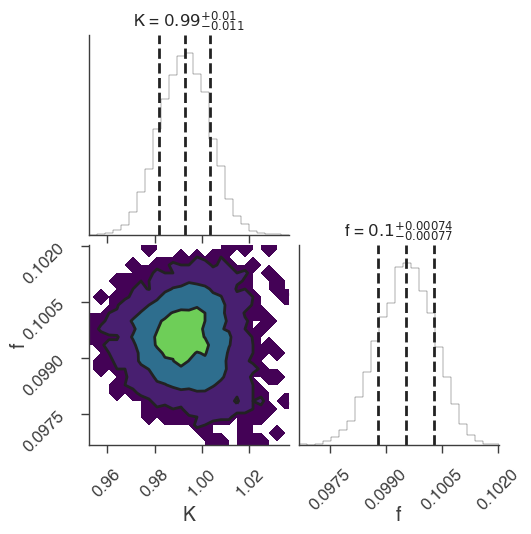

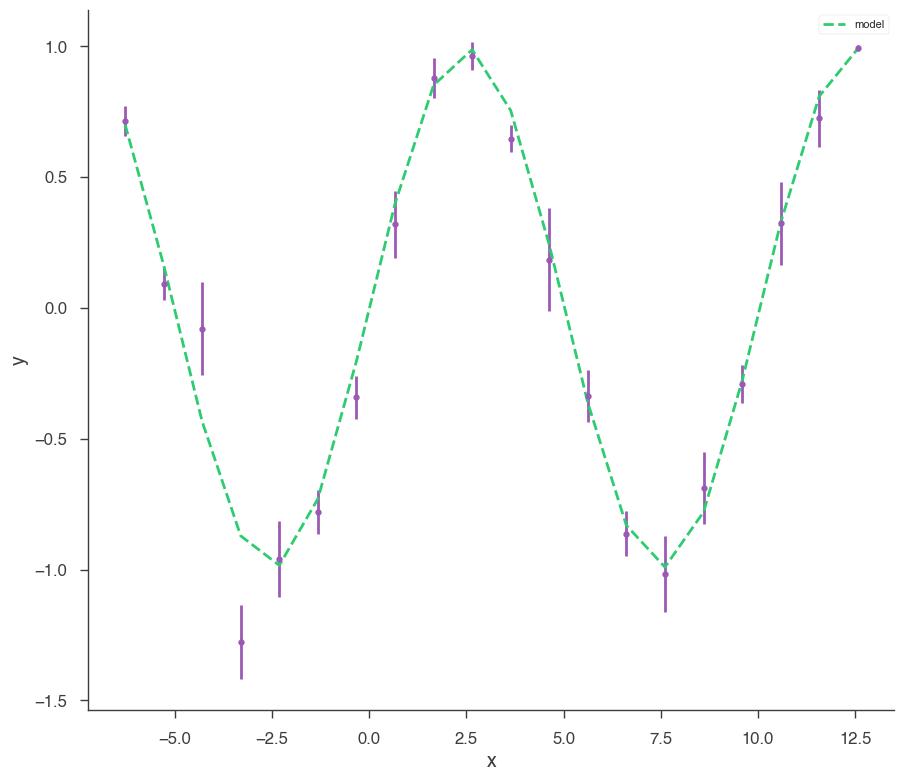

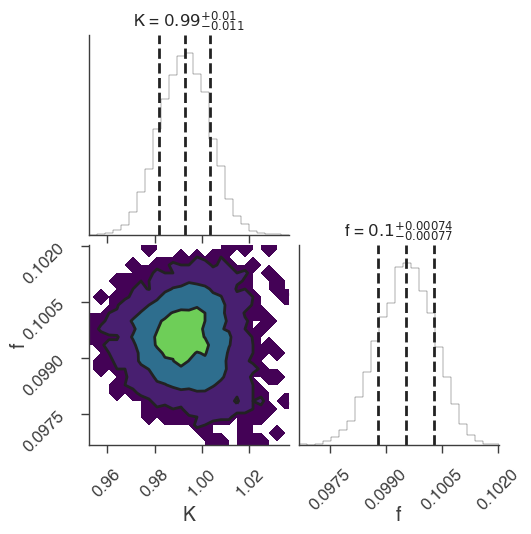

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

19:57:45 INFO      sampler set to ultranest                                                ]8;id=211910;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=770273;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 15678


[ultranest]   logZ = -21.21 +- 0.1323


[ultranest] Effective samples strategy satisfied (ESS = 969.3, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.13 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.


19:57:54 INFO      fit restored to maximum of posterior                                         ]8;id=206623;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=849580;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=468134;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=163651;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.91 -0.08 +0.12) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 +/- 0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.572685
total,-11.572685


Values of statistical measures:

,statistical measures
AIC,27.851251
BIC,29.136834
DIC,26.969841
PDIC,1.903211
log(Z),-9.208075


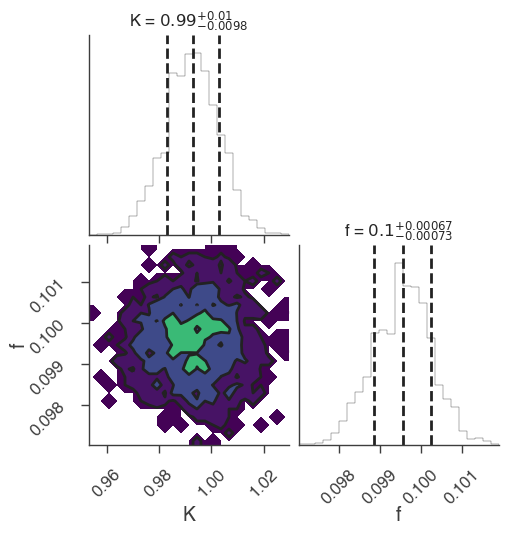

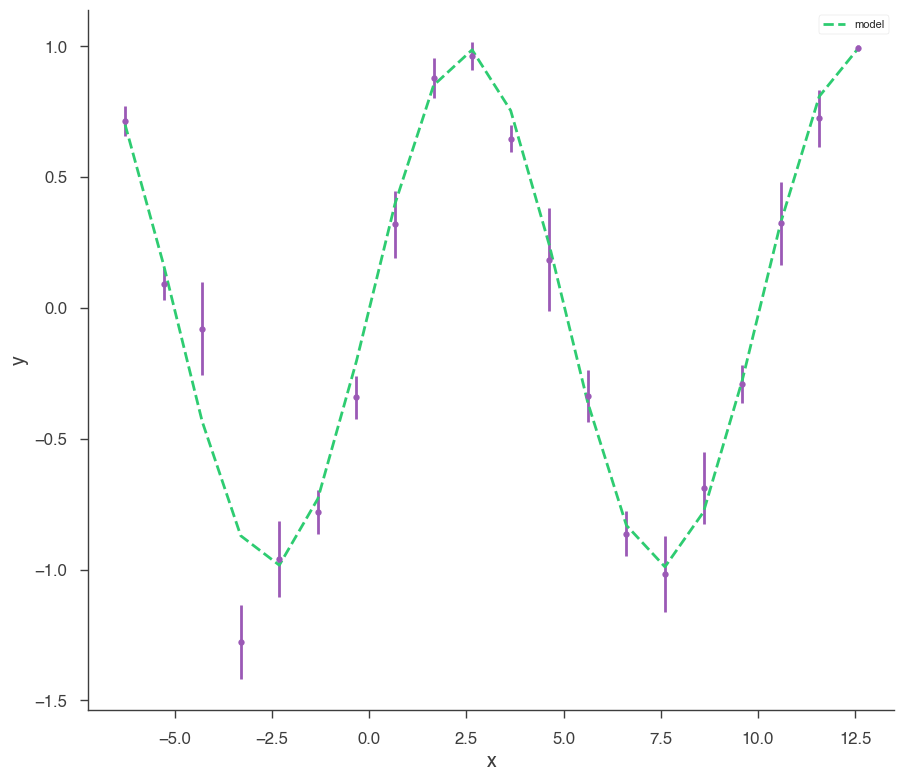

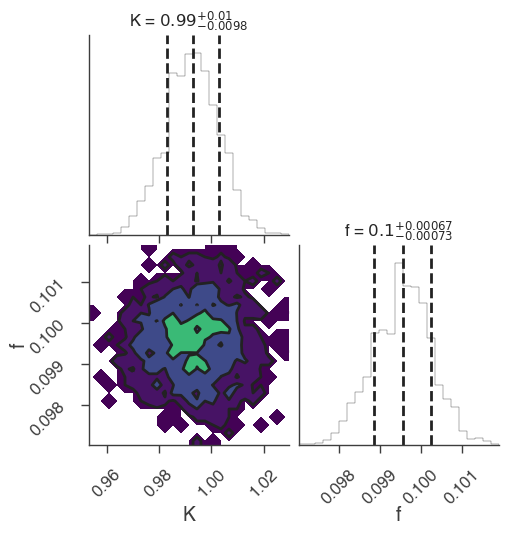

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()